# Automatic tagging

In [1]:
import pandas as pd
from pathlib import Path
from sklearn.pipeline import Pipeline
from matplotlib import pyplot as plt 

## Import des données

In [2]:
staging_path = Path("../PLESNA Compta SYSTEM/staging/CRG/")
assert staging_path.exists()
files = list(staging_path.glob("*.csv"))
files

[PosixPath('../PLESNA Compta SYSTEM/staging/CRG/2020.csv'),
 PosixPath('../PLESNA Compta SYSTEM/staging/CRG/2018.csv'),
 PosixPath('../PLESNA Compta SYSTEM/staging/CRG/2022.csv'),
 PosixPath('../PLESNA Compta SYSTEM/staging/CRG/2021.csv'),
 PosixPath('../PLESNA Compta SYSTEM/staging/CRG/2023.csv'),
 PosixPath('../PLESNA Compta SYSTEM/staging/CRG/2019.csv'),
 PosixPath('../PLESNA Compta SYSTEM/staging/CRG/2017.csv')]

In [3]:
dfs = []
for file in files:
    dfs.append(pd.read_csv(file))
df = pd.concat(dfs)
df.head()

Régie Immeuble Porte  Lot  Année  Mois     Catégorie  Fournisseur  \
0  Imi Gérance        B     9  B09   2020     1  Loyer Charge          NaN   
1  Imi Gérance        S     5  S05   2020     1  Loyer Charge          NaN   
2  Imi Gérance        S     5  S05   2020     1  Loyer Charge          NaN   
3  Imi Gérance        S     2  S02   2020     1  Loyer Charge          NaN   
4  Imi Gérance        S     2  S02   2020     1  Loyer Charge          NaN   

                    Libellé  Débit   Crédit   Impact  
0       Règl. Loyer 01/2020    0.0   100.48   100.48  
1  Règl. Prov. Char 01/2020    0.0   191.00   191.00  
2       Règl. Loyer 01/2020    0.0   745.39   745.39  
3  Règl. Prov. Char 01/2020    0.0   519.00   519.00  
4  Règl. Loyer 01 à 03/2020    0.0  3473.79  3473.79

In [4]:
df = df[~df["Libellé"].isna()]
df = df.assign(
    Fournisseur = df["Fournisseur"].fillna("")
)
df.head()

Régie Immeuble Porte  Lot  Année  Mois     Catégorie Fournisseur  \
0  Imi Gérance        B     9  B09   2020     1  Loyer Charge               
1  Imi Gérance        S     5  S05   2020     1  Loyer Charge               
2  Imi Gérance        S     5  S05   2020     1  Loyer Charge               
3  Imi Gérance        S     2  S02   2020     1  Loyer Charge               
4  Imi Gérance        S     2  S02   2020     1  Loyer Charge               

                    Libellé  Débit   Crédit   Impact  
0       Règl. Loyer 01/2020    0.0   100.48   100.48  
1  Règl. Prov. Char 01/2020    0.0   191.00   191.00  
2       Règl. Loyer 01/2020    0.0   745.39   745.39  
3  Règl. Prov. Char 01/2020    0.0   519.00   519.00  
4  Règl. Loyer 01 à 03/2020    0.0  3473.79  3473.79

In [13]:
X = df["Libellé"]# + df["Fournisseur"]
y = df["Catégorie"]

In [14]:
print(len(X))
print(X.tail())

31929
5857    Honoraires Bien COP33M- 15
5858    Honoraires Bien COP33M- 16
5859    Honoraires Bien COP33M- 17
5860    Honoraires Bien COP33M- 18
5861    Honoraires Bien COP33M- 19
Name: Libellé, dtype: object


## Exploration de l'actuel

<Axes: xlabel='Catégorie'>

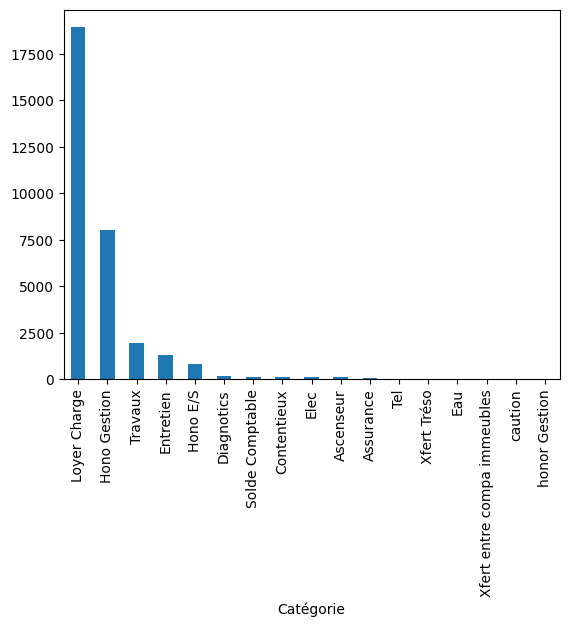

In [7]:
df.Catégorie.value_counts().plot.bar()

## Découpage des datas

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Tokenisation des Libellé

In [9]:
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer

In [10]:
stemmer = SnowballStemmer('french')
analyzer = CountVectorizer().build_analyzer()

In [11]:
def stemmed_words(doc):
    return (stemmer.stem(w) for w in analyzer(doc))

In [12]:
vectorizer = CountVectorizer(analyzer=stemmed_words)

## Créations de modèles

In [13]:
from sklearn.naive_bayes import MultinomialNB

mnb_pipeline = Pipeline([
    ('vect', vectorizer),
    ('clf', MultinomialNB())
])
mnb_pipeline.fit(X_train, y_train)

Pipeline(steps=[('vect',
                 CountVectorizer(analyzer=<function stemmed_words at 0x7017e451cfe0>)),
                ('clf', MultinomialNB())])

In [14]:
from sklearn.svm import LinearSVC

svc_pipeline = Pipeline([
    ('vect', vectorizer),
    ('clf', LinearSVC())
])
svc_pipeline.fit(X_train, y_train)

/home/commun/scripts/Plesna/.venv/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('vect',
                 CountVectorizer(analyzer=<function stemmed_words at 0x7017e451cfe0>)),
                ('clf', LinearSVC())])

In [15]:
from sklearn.linear_model import SGDClassifier


svm_pipeline = Pipeline([
    ('vect', vectorizer),
    ('clf', SGDClassifier())
])
svm_pipeline.fit(X_train, y_train)

Pipeline(steps=[('vect',
                 CountVectorizer(analyzer=<function stemmed_words at 0x7017e451cfe0>)),
                ('clf', SGDClassifier())])

## Évaluation

In [16]:
from sklearn.metrics import accuracy_score

In [17]:
y_pred = mnb_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("MNB ccuracy: {:.2f}%".format(accuracy * 100))

MNB ccuracy: 94.15%


In [18]:
X_test[y_test!=y_pred]

742                                     33BLO- DIAG LOT 4
928                                    33BLO- PLAQUES LOC
3466                           4SER-lot 1 FRAIS COMM DIAG
65                                FORFAIT REGLAGE HORLOGE
219                            PC - ENTRETIEN ELECTRICITE
                              ...                        
51      Solde Départ - Remboursement Solde D.G. Du 120...
669              Gestion impaye locataire ALUR Du 28/09/2
2188                         4SER - Mise en demeure KALAI
3251                             33BLO-LOT REMISE GESTION
1665                        1MAR - MAINTENANCE ELECTRIQUE
Length: 186, dtype: object

In [19]:
y_pred = svc_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("SVC Accuracy: {:.2f}%".format(accuracy * 100))

SVC Accuracy: 95.85%


In [20]:
X_test[y_test!=y_pred]

3062                                33BLO- LOT 15 PLAQUES
928                                    33BLO- PLAQUES LOC
268                                 1MAR-CONSOMMATION EAU
440                                PC - CONTRAT ASCENSEUR
2085                           vac hor INST COMPTEUR ELEC
                              ...                        
1057                                  Accès Extranet 2020
51      Solde Départ - Remboursement Solde D.G. Du 120...
2188                         4SER - Mise en demeure KALAI
3162                        1MAR- SUIVI TRAVAUX DEBARRASS
1665                        1MAR - MAINTENANCE ELECTRIQUE
Length: 132, dtype: object

In [21]:
y_pred = svm_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("SVC Accuracy: {:.2f}%".format(accuracy * 100))

SVC Accuracy: 95.97%


In [22]:
display(X_test[y_test!=y_pred])

3062                                33BLO- LOT 15 PLAQUES
928                                    33BLO- PLAQUES LOC
268                                 1MAR-CONSOMMATION EAU
65                                FORFAIT REGLAGE HORLOGE
123                                1MAR- dossier Grosjean
                              ...                        
1057                                  Accès Extranet 2020
51      Solde Départ - Remboursement Solde D.G. Du 120...
2188                         4SER - Mise en demeure KALAI
3162                        1MAR- SUIVI TRAVAUX DEBARRASS
1665                        1MAR - MAINTENANCE ELECTRIQUE
Length: 128, dtype: object

In [23]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(X_test[y_test!=y_pred])

3062                                33BLO- LOT 15 PLAQUES
928                                    33BLO- PLAQUES LOC
268                                 1MAR-CONSOMMATION EAU
65                                FORFAIT REGLAGE HORLOGE
123                                1MAR- dossier Grosjean
440                                PC - CONTRAT ASCENSEUR
3078                       33BLO- VAC HOR PB CANALISA OFF
1662                        4SER - MAINTENANCE ELECTRIQUE
85                              DESINSECTISATION PUNAISES
1550                                4 SER - EDF ASCENSEUR
1710                       Extranet gestion locative 2017
1061                                  Accès Extranet 2020
2530                                       1MAR- RAMONAGE
3800                                  1MAR- lot 6 plaques
3766                            1MAR- lot 6 SUIVI TRAVAUX
1998                                  4SER- PLAQUES LOT 7
1865             Frais suivi d'impaye Du 01052020 Au 3105
4246          

## Optimisations


In [24]:
from sklearn.model_selection import GridSearchCV

### Modèle Naive Bayes

In [25]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer


mnb_pipeline = Pipeline([
    ('vect', CountVectorizer()),
    #('tfid', TfidfTransformer()),
    ('clf', MultinomialNB())
])

In [26]:
parameters = {
    'vect__ngram_range': [(1, 1), (1, 2), (2,2)],
    #'tfidf__use_idf': (True, False),
    'clf__alpha': (1, 1e-1,1e-2, 1e-3,),
}

In [27]:
gs_clf = GridSearchCV(mnb_pipeline, parameters, n_jobs=-1)
gs_clf = gs_clf.fit(X, y)

/home/commun/scripts/Plesna/.venv/lib/python3.11/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [28]:
gs_clf.best_score_

0.9446366782006921

In [29]:
gs_clf.best_params_

{'clf__alpha': 0.001, 'vect__ngram_range': (1, 2)}

### Linear SVC

In [34]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.svm import LinearSVC

svc_pipeline = Pipeline([
    ('vect', CountVectorizer()),
    #('tfid', TfidfTransformer()),
    ('clf', LinearSVC())
])

In [ ]:
parameters = {
    'vect__ngram_range': [(1, 1), (1, 2), (2,2)],
    #'tfidf__use_idf': (True, False),
    'clf__alpha': (1, 1e-1,1e-2, 1e-3,),
}

### SGD

In [35]:
from sklearn.linear_model import SGDClassifier


sgd_pipeline = Pipeline([
    ('vect', vectorizer),
    ('clf', SGDClassifier())
])

In [36]:
parameters = {
    'vect__ngram_range': [(1, 1), (1, 2), (2,2)],
    #'tfidf__use_idf': (True, False),
    'clf__tol': (1, 1e-1,1e-2, 1e-3,),
}

In [37]:
gs_clf = GridSearchCV(sgd_pipeline, parameters, n_jobs=-1)
gs_clf = gs_clf.fit(X, y)

/home/commun/scripts/Plesna/.venv/lib/python3.11/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/home/commun/scripts/Plesna/.venv/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:541: UserWarning: The parameter 'ngram_range' will not be used since 'analyzer' is callable'
  warnings.warn(
/home/commun/scripts/Plesna/.venv/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:541: UserWarning: The parameter 'ngram_range' will not be used since 'analyzer' is callable'
  warnings.warn(
/home/commun/scripts/Plesna/.venv/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:541: UserWarning: The parameter 'ngram_range' will not be used since 'analyzer' is callable'
  warnings.warn(
/home/commun/scripts/Plesna/.venv/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:541: UserWarning: The parameter 'ngram_range' will not be used s

In [38]:
gs_clf.best_score_

0.9485372758729159

In [39]:
gs_clf.best_params_

{'clf__tol': 0.001, 'vect__ngram_range': (1, 1)}